## Virginia independent cities

Reference https://en.wikipedia.org/wiki/Independent_city_(United_States)

> In the United States, an independent city is a city that is not in the territory of any county or counties with exceptions noted below. Of the 41 independent U.S. cities,[1] 38 are in Virginia, whose state constitution makes them a special case. The three independent cities outside Virginia are Baltimore, Maryland; St. Louis, Missouri; and Carson City, Nevada. The U.S. Census Bureau uses counties as its base unit for presentation of statistical information, and treats independent cities as county equivalents for those purposes. The most populous of them is Baltimore, Maryland. 


### From BEA Income Data:
> Virginia combination areas consist of one or two independent cities with 1980 populations of less than 100,000 combined with an adjacent county. The county name appears first, followed by the city name(s). Separate estimates for the jurisdictions making up the combination area are not available. Bedford County, VA includes the independent city of Bedford for all years.

### Virginia
> The Commonwealth of Virginia is divided into 95 counties, along with 38 independent cities that are considered county-equivalents for census purposes. The map in this article, taken from the official United States Census Bureau site, includes Clifton Forge and Bedford as independent cities. This reflected the political reality at the time of the 2000 Census. However, both have since chosen to revert to town status. In Virginia, cities are co-equal levels of government to counties, but towns are part of counties. For some counties, for statistical purposes, the Bureau of Economic Analysis combines any independent cities with the county that it was once part of (before the legislation creating independent cities took place in 1871).

[Source](https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia)

### Approach

Dissolve boundaries of independent cities that BEA does not disclose values for with their adjacent county.

In [6]:
import pandas
import geopandas
%matplotlib inline

In [7]:

csv = pandas.read_csv('51.csv')

In [8]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8670,"""51000""",Virginia,5,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,17847652,...,356434411,348944176,364382497,386298008,404772481,402064568,420235927,440823733,448683501,466743276
1,8671,"""51000""",Virginia,5,CAINC1,2,...,Population (persons) 1/,Number of persons,4614000,...,7833496,7925937,8025206,8107548,8188656,8261689,8316902,8366767,8414380,8470020
2,8672,"""51000""",Virginia,5,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3868,...,45501,44026,45405,47647,49431,48666,50528,52687,53323,55105
3,8673,"""51001""","Accomack, VA",5,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,72875,...,1090928,1089574,1112288,1129193,1181700,1188926,1227111,1277179,1283155,1324623
4,8674,"""51001""","Accomack, VA",5,CAINC1,2,...,Population (persons) 1/,Number of persons,29308,...,33970,33415,33147,33222,33264,32963,32965,32911,32818,32545


In [9]:
csv['GeoFIPS'] = [fip.strip().replace("\"", "") for fip in csv.GeoFIPS]

In [10]:
gdf = geopandas.read_file('tl_2019_us_county.shp')

gdf = geopandas.read_file("zip:tl_2019_us_county.zip!tl_2019_us_county.shp")
zipfile = "zip:tl_2019_us_county.zip!tl_2019_us_county.shp"

In [11]:
virginia_gdf = gdf[gdf.STATEFP=="51"]

<AxesSubplot:>

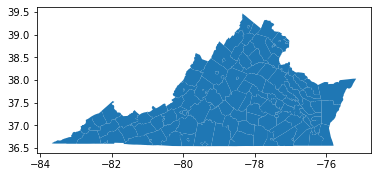

In [12]:
virginia_gdf.plot()

In [13]:
virginia_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
27,51,775,01789074,51775,Salem,Salem city,25,C7,G4020,None,40220,None,F,37602710,275156,+37.2853329,-080.0552407,"POLYGON ((-80.12049 37.28705, -80.12015 37.287..."
28,51,121,01674630,51121,Montgomery,Montgomery County,06,H1,G4020,None,13980,None,A,1001921573,6289787,+37.1755344,-080.3877913,"MULTIPOLYGON (((-80.55224 37.16172, -80.55228 ..."
36,51,735,01498436,51735,Poquoson,Poquoson city,25,C7,G4020,545,47260,None,F,39837595,163455830,+37.1283599,-076.3035337,"POLYGON ((-76.41367 37.13862, -76.41338 37.139..."
39,51,095,01480135,51095,James City,James City County,06,H1,G4020,545,47260,None,A,368724192,95246387,+37.3248367,-076.7778878,"POLYGON ((-76.89270 37.42427, -76.89273 37.424..."
49,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,47900,47894,A,697237202,28088011,+38.4132608,-077.4513342,"POLYGON ((-77.58878 38.50404, -77.58295 38.508..."


In [14]:
data = csv

In [15]:
data.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8670,51000,Virginia,5,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,17847652,...,356434411,348944176,364382497,386298008,404772481,402064568,420235927,440823733,448683501,466743276
1,8671,51000,Virginia,5,CAINC1,2,...,Population (persons) 1/,Number of persons,4614000,...,7833496,7925937,8025206,8107548,8188656,8261689,8316902,8366767,8414380,8470020
2,8672,51000,Virginia,5,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3868,...,45501,44026,45405,47647,49431,48666,50528,52687,53323,55105
3,8673,51001,"Accomack, VA",5,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,72875,...,1090928,1089574,1112288,1129193,1181700,1188926,1227111,1277179,1283155,1324623
4,8674,51001,"Accomack, VA",5,CAINC1,2,...,Population (persons) 1/,Number of persons,29308,...,33970,33415,33147,33222,33264,32963,32965,32911,32818,32545


In [16]:
data['GEOID'] = data.GeoFIPS

In [17]:
data.GEOID

0      51000
1      51000
2      51000
3      51001
4      51001
       ...  
313    51955
314    51955
315    51958
316    51958
317    51958
Name: GEOID, Length: 318, dtype: object

## gdf records missing income values

In [18]:
#data = data[data.LineCode==3]
merged_gdf = virginia_gdf.merge(data, on='GEOID')

<AxesSubplot:>

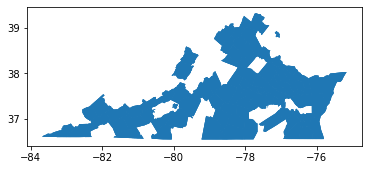

In [19]:
merged_gdf.plot()

In [20]:
merged_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,5598667,5771841,6051523,6377898,6564332,6618516,6806720,7145523,7413434,7779485
1,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,124323,126449,129822,132207,133376,135978,138802,140891,143477,146649
2,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,45033,45646,46614,48242,49217,48673,49039,50717,51670,53048
3,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,236619,237659,235027,241403,244447,243534,255985,274412,263711,277471
4,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,7061,7037,7045,6923,6839,6788,6781,6670,6570,6540


In [21]:
merged_gdf.shape[0]/3

82.0

In [22]:
matched_names = set(merged_gdf.NAMELSAD)

In [23]:
matched_names

{'Accomack County',
 'Alexandria city',
 'Amelia County',
 'Amherst County',
 'Appomattox County',
 'Arlington County',
 'Bath County',
 'Bedford County',
 'Bland County',
 'Botetourt County',
 'Brunswick County',
 'Buchanan County',
 'Buckingham County',
 'Caroline County',
 'Charles City County',
 'Charlotte County',
 'Chesapeake city',
 'Chesterfield County',
 'Clarke County',
 'Craig County',
 'Culpeper County',
 'Cumberland County',
 'Dickenson County',
 'Essex County',
 'Fauquier County',
 'Floyd County',
 'Fluvanna County',
 'Franklin County',
 'Giles County',
 'Gloucester County',
 'Goochland County',
 'Grayson County',
 'Greene County',
 'Halifax County',
 'Hampton city',
 'Hanover County',
 'Henrico County',
 'Highland County',
 'Isle of Wight County',
 'King George County',
 'King William County',
 'King and Queen County',
 'Lancaster County',
 'Lee County',
 'Loudoun County',
 'Louisa County',
 'Lunenburg County',
 'Madison County',
 'Mathews County',
 'Mecklenburg County',

In [24]:
missing_gdf = virginia_gdf[~virginia_gdf.GEOID.isin(merged_gdf.GEOID)]

In [25]:
missing_names = set(missing_gdf.NAMELSAD)

In [26]:
missing_names

{'Albemarle County',
 'Alleghany County',
 'Augusta County',
 'Bristol city',
 'Buena Vista city',
 'Campbell County',
 'Carroll County',
 'Charlottesville city',
 'Colonial Heights city',
 'Covington city',
 'Danville city',
 'Dinwiddie County',
 'Emporia city',
 'Fairfax County',
 'Fairfax city',
 'Falls Church city',
 'Franklin city',
 'Frederick County',
 'Fredericksburg city',
 'Galax city',
 'Greensville County',
 'Harrisonburg city',
 'Henry County',
 'Hopewell city',
 'James City County',
 'Lexington city',
 'Lynchburg city',
 'Manassas Park city',
 'Manassas city',
 'Martinsville city',
 'Montgomery County',
 'Norton city',
 'Petersburg city',
 'Pittsylvania County',
 'Poquoson city',
 'Prince George County',
 'Prince William County',
 'Radford city',
 'Roanoke County',
 'Rockbridge County',
 'Rockingham County',
 'Salem city',
 'Southampton County',
 'Spotsylvania County',
 'Staunton city',
 'Washington County',
 'Waynesboro city',
 'Williamsburg city',
 'Winchester city',
 '

<AxesSubplot:>

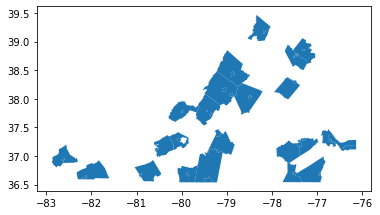

In [27]:
missing_gdf.plot()

In [28]:
missing_gdf.shape

(51, 18)

In [29]:
missing_gdf

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
27,51,775,01789074,51775,Salem,Salem city,25,C7,G4020,None,40220,None,F,37602710,275156,+37.2853329,-080.0552407,"POLYGON ((-80.12049 37.28705, -80.12015 37.287..."
28,51,121,01674630,51121,Montgomery,Montgomery County,06,H1,G4020,None,13980,None,A,1001921573,6289787,+37.1755344,-080.3877913,"MULTIPOLYGON (((-80.55224 37.16172, -80.55228 ..."
36,51,735,01498436,51735,Poquoson,Poquoson city,25,C7,G4020,545,47260,None,F,39837595,163455830,+37.1283599,-076.3035337,"POLYGON ((-76.41367 37.13862, -76.41338 37.139..."
39,51,095,01480135,51095,James City,James City County,06,H1,G4020,545,47260,None,A,368724192,95246387,+37.3248367,-076.7778878,"POLYGON ((-76.89270 37.42427, -76.89273 37.424..."
268,51,089,01502770,51089,Henry,Henry County,06,H1,G4020,None,32300,None,A,990284619,5269785,+36.7814785,-079.7592313,"POLYGON ((-80.06909 36.67402, -80.06911 36.674..."
302,51,540,01789068,51540,Charlottesville,Charlottesville city,25,C7,G4020,None,16820,None,F,26533570,47161,+38.0376579,-078.4853806,"POLYGON ((-78.52368 38.02233, -78.52363 38.022..."
317,51,820,01498443,51820,Waynesboro,Waynesboro city,25,C7,G4020,277,44420,None,F,38771594,364644,+38.0671571,-078.9014197,"POLYGON ((-78.94851 38.06810, -78.94911 38.068..."
377,51,595,01498422,51595,Emporia,Emporia city,25,C7,G4020,None,None,None,F,17881071,165621,+36.6961820,-077.5359753,"POLYGON ((-77.56389 36.70307, -77.56355 36.703..."
402,51,580,01789069,51580,Covington,Covington city,25,C7,G4020,None,None,None,F,14163842,521492,+37.7810603,-079.9854337,"POLYGON ((-80.00899 37.76259, -80.00889 37.762..."
423,51,005,01673675,51005,Alleghany,Alleghany County,06,H1,G4020,None,None,None,A,1156608818,8170515,+37.7879048,-080.0086690,"POLYGON ((-80.20146 37.82581, -80.20117 37.826..."


In [30]:
#names = missing_gdf.NAME
names = missing_gdf.NAMELSAD

In [31]:
virginia_income = data[data.GeoName.str.contains(", VA")]

In [32]:
virginia_income.shape

(315, 59)

In [33]:
virginia_income.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,GEOID
3,8673,51001,"Accomack, VA",5,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,72875,...,1089574,1112288,1129193,1181700,1188926,1227111,1277179,1283155,1324623,51001
4,8674,51001,"Accomack, VA",5,CAINC1,2,...,Population (persons) 1/,Number of persons,29308,...,33415,33147,33222,33264,32963,32965,32911,32818,32545,51001
5,8675,51001,"Accomack, VA",5,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2487,...,32607,33556,33989,35525,36069,37225,38807,39099,40701,51001
6,8676,51007,"Amelia, VA",5,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,18123,...,403821,427150,437215,459614,493801,509705,535479,538046,560273,51007
7,8677,51007,"Amelia, VA",5,CAINC1,2,...,Population (persons) 1/,Number of persons,7702,...,12594,12746,12752,12747,12659,12717,12784,12830,13020,51007


In [34]:
geonames = pandas.unique(virginia_income.GeoName)

In [35]:
geonames

array(['Accomack, VA', 'Amelia, VA', 'Amherst, VA', 'Appomattox, VA',
       'Arlington, VA', 'Bath, VA', 'Bedford, VA*', 'Bland, VA',
       'Botetourt, VA', 'Brunswick, VA', 'Buchanan, VA', 'Buckingham, VA',
       'Caroline, VA', 'Charles City, VA', 'Charlotte, VA',
       'Chesterfield, VA', 'Clarke, VA', 'Craig, VA', 'Culpeper, VA',
       'Cumberland, VA', 'Dickenson, VA', 'Essex, VA', 'Fauquier, VA',
       'Floyd, VA', 'Fluvanna, VA', 'Franklin, VA', 'Giles, VA',
       'Gloucester, VA', 'Goochland, VA', 'Grayson, VA', 'Greene, VA',
       'Halifax, VA', 'Hanover, VA', 'Henrico, VA', 'Highland, VA',
       'Isle of Wight, VA', 'King and Queen, VA', 'King George, VA',
       'King William, VA', 'Lancaster, VA', 'Lee, VA', 'Loudoun, VA',
       'Louisa, VA', 'Lunenburg, VA', 'Madison, VA', 'Mathews, VA',
       'Mecklenburg, VA', 'Middlesex, VA', 'Nelson, VA', 'New Kent, VA',
       'Northampton, VA', 'Northumberland, VA', 'Nottoway, VA',
       'Orange, VA', 'Page, VA', 'Patrick

In [36]:
class Combination:
    def __init__(self, label):
        n_commas = label.count(",")
        self.label = label
        self.n_commas = n_commas
        if "Fairfax City" in label:
            label = label.replace('Fairfax City', 'Fairfax')
        if n_commas == 1:
            if "Bedford" in label:
                self.county = 'Bedford'
                self.cities = []
            else:
                words = label.split("+")
                county = words[0].strip()
                self.county = county
                self.cities = [words[-1].split(",")[0].strip()+" city"]
        elif n_commas == 2:
            words = label.split(",")
            self.county = words[0].strip()
            cities = words[1]
            cities = cities.split("+")
            
            self.cities = [city.strip()+" city" for city in cities]
        else:
            print('Bad label: ', label)
        self.county = self.county + " County"
        self.NAMELSAD = self.label
        

In [37]:
combinations_0 = [name for name in geonames if "VA*" in name]
combinations = [Combination(c) for c in combinations_0]

In [38]:
c0 = combinations[0]
c0.label

'Bedford, VA*'

In [39]:
matches = {}
for name in names:
    hits = []
    matches[name] = []
    if "city" in name:
        hits = [comb for comb in combinations if name in comb.cities]
    else:
        hits = [comb for comb in combinations if name == comb.county]
    if hits:
        matches[name] = hits[0].label
    
        
        

## Match combinations to rows of df

In [40]:
for combination in combinations:
    print("label: ",combination.label)
    comb_names = [combination.county]+combination.cities
    print(comb_names)

label:  Bedford, VA*
['Bedford County']
label:  Albemarle + Charlottesville, VA*
['Albemarle County', 'Charlottesville city']
label:  Alleghany + Covington, VA*
['Alleghany County', 'Covington city']
label:  Augusta, Staunton + Waynesboro, VA*
['Augusta County', 'Staunton city', 'Waynesboro city']
label:  Campbell + Lynchburg, VA*
['Campbell County', 'Lynchburg city']
label:  Carroll + Galax, VA*
['Carroll County', 'Galax city']
label:  Dinwiddie, Colonial Heights + Petersburg, VA*
['Dinwiddie County', 'Colonial Heights city', 'Petersburg city']
label:  Fairfax, Fairfax City + Falls Church, VA*
['Fairfax County', 'Fairfax city', 'Falls Church city']
label:  Frederick + Winchester, VA*
['Frederick County', 'Winchester city']
label:  Greensville + Emporia, VA*
['Greensville County', 'Emporia city']
label:  Henry + Martinsville, VA*
['Henry County', 'Martinsville city']
label:  James City + Williamsburg, VA*
['James City County', 'Williamsburg city']
label:  Montgomery + Radford, VA*
['Mo

In [41]:
merged_dfs = []
geoids = []
for combination in combinations:
    places = combination.cities + [combination.county]
    print(places)
    rows = virginia_gdf[virginia_gdf.NAMELSAD.isin(places)]
    
    if len(rows) != len(places):
        print('missed:', places)
    #d_df = rows.dissolve(by='STATEFP')
    rd = rows.dissolve(by='STATEFP').head()
    rd['NAMELSAD']= combination.label
    geoid = virginia_income[virginia_income.GeoName==combination.label].GEOID.values[0]
    rd['GEOID'] = geoid
    merged_dfs.append(rd)
    

['Bedford County']
['Charlottesville city', 'Albemarle County']
['Covington city', 'Alleghany County']
['Staunton city', 'Waynesboro city', 'Augusta County']
['Lynchburg city', 'Campbell County']
['Galax city', 'Carroll County']
['Colonial Heights city', 'Petersburg city', 'Dinwiddie County']
['Fairfax city', 'Falls Church city', 'Fairfax County']
['Winchester city', 'Frederick County']
['Emporia city', 'Greensville County']
['Martinsville city', 'Henry County']
['Williamsburg city', 'James City County']
['Radford city', 'Montgomery County']
['Danville city', 'Pittsylvania County']
['Hopewell city', 'Prince George County']
['Manassas city', 'Manassas Park city', 'Prince William County']
['Salem city', 'Roanoke County']
['Buena Vista city', 'Lexington city', 'Rockbridge County']
['Harrisonburg city', 'Rockingham County']
['Franklin city', 'Southampton County']
['Fredericksburg city', 'Spotsylvania County']
['Bristol city', 'Washington County']
['Norton city', 'Wise County']
['Poquoson c

In [42]:
rows.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
36,51,735,01498436,51735,Poquoson,Poquoson city,25,C7,G4020,545,47260,None,F,39837595,163455830,+37.1283599,-076.3035337,"POLYGON ((-76.41367 37.13862, -76.41338 37.139..."
2966,51,199,01480182,51199,York,York County,06,H1,G4020,545,47260,None,A,270935371,285552364,+37.2190813,-076.5616481,"POLYGON ((-76.56519 37.22054, -76.56521 37.220..."


In [43]:
rd.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
51,"POLYGON ((-76.13552 37.19197, -76.13527 37.158...",735,01498436,51958,Poquoson,"York + Poquoson, VA*",25,C7,G4020,545,47260,None,F,39837595,163455830,+37.1283599,-076.3035337


In [44]:
dissolved = pandas.concat(merged_dfs)

In [45]:
dissolved.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
51,"POLYGON ((-79.63421 37.45702, -79.63409 37.456...",019,01674818,51019,Bedford,"Bedford, VA*",06,H1,G4020,None,31340,None,A,1968605128,42118517,+37.3122568,-079.5272234
51,"POLYGON ((-78.80140 37.98263, -78.80241 37.984...",540,01789068,51901,Charlottesville,"Albemarle + Charlottesville, VA*",25,C7,G4020,None,16820,None,F,26533570,47161,+38.0376579,-078.4853806
51,"POLYGON ((-80.20146 37.82581, -80.20117 37.826...",580,01789069,51903,Covington,"Alleghany + Covington, VA*",25,C7,G4020,None,None,None,F,14163842,521492,+37.7810603,-079.9854337
51,"POLYGON ((-79.36786 38.01803, -79.37404 38.021...",820,01498443,51907,Waynesboro,"Augusta, Staunton + Waynesboro, VA*",25,C7,G4020,277,44420,None,F,38771594,364644,+38.0671571,-078.9014197
51,"POLYGON ((-79.30244 37.28438, -79.30220 37.284...",031,01674917,51911,Campbell,"Campbell + Lynchburg, VA*",06,H1,G4020,None,31340,None,A,1303300941,8894442,+37.2101515,-079.0954282


In [46]:
d_merge = dissolved.merge(virginia_income, on='GEOID')

In [47]:
d_merge.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"POLYGON ((-79.63421 37.45702, -79.63409 37.456...",019,01674818,51019,Bedford,"Bedford, VA*",06,H1,G4020,None,...,2696045,2678191,2715575,2838513,2973578,3001522,3129081,3297923,3311202,3417264
1,"POLYGON ((-79.63421 37.45702, -79.63409 37.456...",019,01674818,51019,Bedford,"Bedford, VA*",06,H1,G4020,None,...,73744,74573,75040,75560,75758,76195,77035,77562,77828,77974
2,"POLYGON ((-79.63421 37.45702, -79.63409 37.456...",019,01674818,51019,Bedford,"Bedford, VA*",06,H1,G4020,None,...,36560,35914,36188,37566,39251,39393,40619,42520,42545,43826
3,"POLYGON ((-78.80140 37.98263, -78.80241 37.984...",540,01789068,51901,Charlottesville,"Albemarle + Charlottesville, VA*",25,C7,G4020,None,...,7188821,6825990,7209179,7623402,8402062,8270217,8881388,9494461,9981222,10531351
4,"POLYGON ((-78.80140 37.98263, -78.80241 37.984...",540,01789068,51901,Charlottesville,"Albemarle + Charlottesville, VA*",25,C7,G4020,None,...,139211,141125,142703,144094,146077,147430,149410,151694,153705,155721


In [48]:
d_merge.shape

(72, 75)

<AxesSubplot:>

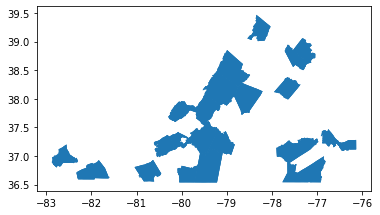

In [49]:
d_merge.plot()

<AxesSubplot:>

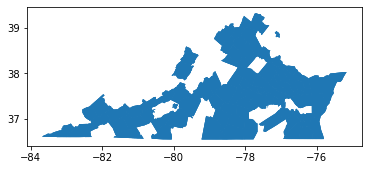

In [50]:
merged_gdf.plot()

<AxesSubplot:>

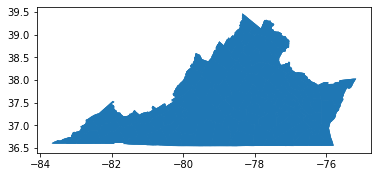

In [51]:
final_gdf = pandas.concat([merged_gdf, d_merge])
final_gdf.plot()

In [52]:
final_gdf.shape

(318, 76)

In [53]:
virginia_gdf.shape

(133, 18)

In [54]:
final_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,5598667,5771841,6051523,6377898,6564332,6618516,6806720,7145523,7413434,7779485
1,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,124323,126449,129822,132207,133376,135978,138802,140891,143477,146649
2,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,45033,45646,46614,48242,49217,48673,49039,50717,51670,53048
3,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,236619,237659,235027,241403,244447,243534,255985,274412,263711,277471
4,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,7061,7037,7045,6923,6839,6788,6781,6670,6570,6540


In [55]:
final_gdf.tail()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,NaN,720,01498434,51955,Norton,"Wise + Norton, VA*",25,C7,G4020,None,...,45350,45357,45583,45535,45034,44764,44036,43567,43022,42522
68,NaN,720,01498434,51955,Norton,"Wise + Norton, VA*",25,C7,G4020,None,...,27531,28516,30485,31511,30802,29494,30164,30893,30533,31849
69,NaN,735,01498436,51958,Poquoson,"York + Poquoson, VA*",25,C7,G4020,545,...,3686780,3620374,3738324,3869473,3974745,4005287,4201387,4325492,4378441,4529273
70,NaN,735,01498436,51958,Poquoson,"York + Poquoson, VA*",25,C7,G4020,545,...,77047,77350,77440,77900,78003,78170,78605,79834,79689,79792
71,NaN,735,01498436,51958,Poquoson,"York + Poquoson, VA*",25,C7,G4020,545,...,47851,46805,48274,49672,50956,51238,53449,54181,54944,56763


<AxesSubplot:>

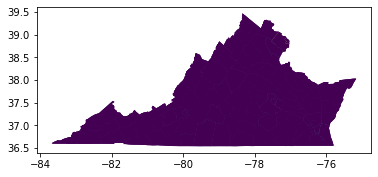

In [56]:
final_gdf.plot(column='1978')

In [57]:
final_gdf['1979'] = final_gdf['1979'].astype(int)

<AxesSubplot:>

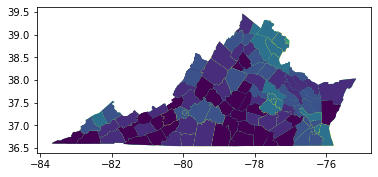

In [58]:
final_gdf.plot(column='1979', legend=False, scheme='Quantiles', k=9)

In [59]:
final_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'Unnamed: 0', 'GeoFIPS',
       'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification',
       'Description', 'Unit', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [60]:
final_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,5598667,5771841,6051523,6377898,6564332,6618516,6806720,7145523,7413434,7779485
1,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,124323,126449,129822,132207,133376,135978,138802,140891,143477,146649
2,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,45033,45646,46614,48242,49217,48673,49039,50717,51670,53048
3,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,236619,237659,235027,241403,244447,243534,255985,274412,263711,277471
4,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,7061,7037,7045,6923,6839,6788,6781,6670,6570,6540


In [61]:
final_gdf.shape

(318, 76)

In [62]:
327859/37657 * 1000

8706.455639057811

In [63]:
318/3


106.0

In [64]:
final_gdf.STATEFP='51'

In [65]:
final_gdf[final_gdf.NAME=='Charlottesville']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3,51,540,01789068,51901,Charlottesville,"Albemarle + Charlottesville, VA*",25,C7,G4020,None,...,7188821,6825990,7209179,7623402,8402062,8270217,8881388,9494461,9981222,10531351
4,51,540,01789068,51901,Charlottesville,"Albemarle + Charlottesville, VA*",25,C7,G4020,None,...,139211,141125,142703,144094,146077,147430,149410,151694,153705,155721
5,51,540,01789068,51901,Charlottesville,"Albemarle + Charlottesville, VA*",25,C7,G4020,None,...,51640,48368,50519,52906,57518,56096,59443,62590,64938,67630


In [66]:
727271*1000/93879

7746.8976022326615

## Reverse Matching

Which income records do not match a record in the shapefile

In [67]:
virginia_gdf = gdf[gdf.STATEFP=="51"]

In [68]:
#data = data[data.LineCode==3]
merged_df = data.merge(virginia_gdf, on='GEOID')

In [69]:
merged_df.shape

(246, 76)

In [70]:
missing_df = data[~data.GEOID.isin(merged_df.GEOID)]
#~virginia_gdf.GEOID.isin(merged_gdf.GEOID)

In [71]:
set(missing_df.GeoName)

{'Albemarle + Charlottesville, VA*',
 'Alleghany + Covington, VA*',
 'Augusta, Staunton + Waynesboro, VA*',
 'Campbell + Lynchburg, VA*',
 'Carroll + Galax, VA*',
 'Dinwiddie, Colonial Heights + Petersburg, VA*',
 'Fairfax, Fairfax City + Falls Church, VA*',
 'Frederick + Winchester, VA*',
 'Greensville + Emporia, VA*',
 'Henry + Martinsville, VA*',
 'James City + Williamsburg, VA*',
 'Montgomery + Radford, VA*',
 'Pittsylvania + Danville, VA*',
 'Prince George + Hopewell, VA*',
 'Prince William, Manassas + Manassas Park, VA*',
 'Roanoke + Salem, VA*',
 'Rockbridge, Buena Vista + Lexington, VA*',
 'Rockingham + Harrisonburg, VA*',
 'Southampton + Franklin, VA*',
 'Spotsylvania + Fredericksburg, VA*',
 'Virginia',
 'Washington + Bristol, VA*',
 'Wise + Norton, VA*',
 'York + Poquoson, VA*'}

In [72]:
pcincome_gdf = geopandas.read_file('pcincome0.shp')

In [73]:
pcincome_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,geometry
0,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,...,388053,387623,365655,367837,376622,395399,417058,419915,444182,"POLYGON ((-85.97879 33.32757, -85.97876 33.328..."
1,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,...,14006,13900,13688,13434,13406,13440,13414,13410,13367,"POLYGON ((-85.97879 33.32757, -85.97876 33.328..."
2,01,027,00161539,01027,Clay,Clay County,06,H1,G4020,None,...,27706,27887,26714,27381,28094,29420,31091,31314,33230,"POLYGON ((-85.97879 33.32757, -85.97876 33.328..."
3,01,091,00161572,01091,Marengo,Marengo County,06,H1,G4020,None,...,618986,643067,658510,672442,682230,703891,713222,717118,737908,"POLYGON ((-87.92970 32.29252, -87.93180 32.297..."
4,01,091,00161572,01091,Marengo,Marengo County,06,H1,G4020,None,...,21170,20944,20649,20360,20105,19975,19757,19505,19375,"POLYGON ((-87.92970 32.29252, -87.93180 32.297..."


In [74]:
final_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,5598667,5771841,6051523,6377898,6564332,6618516,6806720,7145523,7413434,7779485
1,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,124323,126449,129822,132207,133376,135978,138802,140891,143477,146649
2,51,179,01480173,51179,Stafford,Stafford County,06,H1,G4020,548,...,45033,45646,46614,48242,49217,48673,49039,50717,51670,53048
3,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,236619,237659,235027,241403,244447,243534,255985,274412,263711,277471
4,51,181,01480174,51181,Surry,Surry County,06,H1,G4020,None,...,7061,7037,7045,6923,6839,6788,6781,6670,6570,6540


In [75]:
final_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'Unnamed: 0', 'GeoFIPS',
       'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification',
       'Description', 'Unit', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [76]:
pcincome_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Unnamed_ 0', 'GeoFIPS', 'GeoName',
       'Region', 'TableName', 'LineCode', 'IndustryCl', 'Descriptio', 'Unit',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'geometry'],
      dtype='object')

In [77]:
common = set(pcincome_gdf.columns).intersection(final_gdf.columns)

In [78]:
common

{'1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 'ALAND',
 'AWATER',
 'CBSAFP',
 'CLASSFP',
 'COUNTYFP',
 'COUNTYNS',
 'CSAFP',
 'FUNCSTAT',
 'GEOID',
 'GeoFIPS',
 'GeoName',
 'INTPTLAT',
 'INTPTLON',
 'LSAD',
 'LineCode',
 'METDIVFP',
 'MTFCC',
 'NAME',
 'NAMELSAD',
 'Region',
 'STATEFP',
 'TableName',
 'Unit',
 'geometry'}

In [79]:
us = pcincome_gdf[common]

In [80]:
va = final_gdf[common]


In [81]:
va.reset_index(inplace=True)

In [82]:
dup = va[va[["NAME", "GEOID", "1969"]].duplicated()]

In [83]:
dup.NAME

246    Bedford
247    Bedford
248    Bedford
Name: NAME, dtype: object

In [84]:
dup

,index,INTPTLON,CLASSFP,GeoFIPS,1996,1979,2008,1992,ALAND,1973,...,1994,1995,1970,1991,2012,NAMELSAD,CBSAFP,GeoName,1974,1988
246,0,-079.5272234,H1,51019,1418384,311832,2696045,1047474,1968605128,145128,...,1202511,1298843,102584,970918,2973578,"Bedford, VA*",31340,"Bedford, VA*",164214,764201
247,1,-079.5272234,H1,51019,62320,40243,73744,55438,1968605128,34727,...,58776,60684,32872,53666,75758,"Bedford, VA*",31340,"Bedford, VA*",35696,49296
248,2,-079.5272234,H1,51019,22760,7749,36560,18895,1968605128,4179,...,20459,21403,3121,18092,39251,"Bedford, VA*",31340,"Bedford, VA*",4600,15502


In [85]:
va = va.drop(dup.index)

In [86]:
usva = pandas.concat([us,va])

<AxesSubplot:>

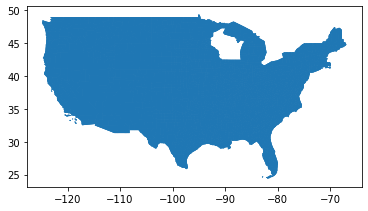

In [87]:
usva.plot()

In [88]:
usva.shape

(9024, 74)

In [89]:
9027/3

3009.0

In [90]:
years = [str(year) for year in range(1969,2018)]
dtypes = list(zip(years,[usva[year].dtype for year in years]))
dtypes

[('1969', dtype('O')),
 ('1970', dtype('O')),
 ('1971', dtype('O')),
 ('1972', dtype('O')),
 ('1973', dtype('O')),
 ('1974', dtype('O')),
 ('1975', dtype('O')),
 ('1976', dtype('O')),
 ('1977', dtype('O')),
 ('1978', dtype('O')),
 ('1979', dtype('O')),
 ('1980', dtype('O')),
 ('1981', dtype('O')),
 ('1982', dtype('O')),
 ('1983', dtype('O')),
 ('1984', dtype('O')),
 ('1985', dtype('O')),
 ('1986', dtype('O')),
 ('1987', dtype('O')),
 ('1988', dtype('O')),
 ('1989', dtype('O')),
 ('1990', dtype('O')),
 ('1991', dtype('O')),
 ('1992', dtype('O')),
 ('1993', dtype('O')),
 ('1994', dtype('O')),
 ('1995', dtype('O')),
 ('1996', dtype('O')),
 ('1997', dtype('O')),
 ('1998', dtype('O')),
 ('1999', dtype('O')),
 ('2000', dtype('O')),
 ('2001', dtype('O')),
 ('2002', dtype('int64')),
 ('2003', dtype('int64')),
 ('2004', dtype('int64')),
 ('2005', dtype('int64')),
 ('2006', dtype('int64')),
 ('2007', dtype('int64')),
 ('2008', dtype('int64')),
 ('2009', dtype('int64')),
 ('2010', dtype('int64'))

In [91]:
usva.to_file('usva.shp')

In [92]:
usva.head()

,INTPTLON,CLASSFP,GeoFIPS,1996,1979,2008,1992,ALAND,1973,Region,...,1995,1970,1991,2012,NAMELSAD,CBSAFP,GeoName,1974,1988,index
0,-085.8635254,H1,01027,251669,79260,399915,207631,1564251834,40439,5,...,243866,30091,193940,367837,Clay County,None,"Clay, AL",42473,149728,NaN
1,-085.8635254,H1,01027,13734,13895,14161,13425,1564251834,12959,5,...,13590,12678,13314,13434,Clay County,None,"Clay, AL",13139,13266,NaN
2,-085.8635254,H1,01027,18325,5704,28241,15466,1564251834,3121,5,...,17945,2373,14567,27381,Clay County,None,"Clay, AL",3233,11287,NaN
3,-087.7910910,H1,01091,418210,147419,631357,347306,2530140237,71939,5,...,402276,53485,325171,672442,Marengo County,None,"Marengo, AL",76954,262819,NaN
4,-087.7910910,H1,01091,22984,25280,21331,23088,2530140237,24207,5,...,23117,23675,23031,20360,Marengo County,None,"Marengo, AL",24273,23616,NaN


In [93]:
usva.columns

Index(['INTPTLON', 'CLASSFP', 'GeoFIPS', '1996', '1979', '2008', '1992',
       'ALAND', '1973', 'Region', '2011', 'FUNCSTAT', '1998', 'NAME', '1978',
       'AWATER', '1975', '1969', '1999', '1977', '1985', '1990', '1993',
       '1972', 'Unit', '2001', '2007', '2005', '2016', '2006', '2000', 'GEOID',
       '1976', '2003', '1984', '2013', '1982', '1997', 'LSAD', '1980', '1981',
       '1986', 'STATEFP', '1983', 'TableName', 'MTFCC', '2004', '2015', '2002',
       'COUNTYFP', '1987', 'COUNTYNS', 'LineCode', 'CSAFP', '1971', 'INTPTLAT',
       '2010', '2009', '2014', 'geometry', '2017', 'METDIVFP', '1989', '1994',
       '1995', '1970', '1991', '2012', 'NAMELSAD', 'CBSAFP', 'GeoName', '1974',
       '1988', 'index'],
      dtype='object')

In [94]:
namedf = usva[['GeoName', 'STATEFP', '1969']]

In [95]:
namedf[namedf.duplicated()]

,GeoName,STATEFP,1969
238,"La Paz, AZ*",04,(NA)
239,"La Paz, AZ*",04,(NA)
706,"Broomfield, CO*",08,(NA)
707,"Broomfield, CO*",08,(NA)
5311,"Cibola, NM*",35,(NA)
5312,"Cibola, NM*",35,(NA)


In [96]:
namedf[namedf.GeoName=='Bedford, VA*']

,GeoName,STATEFP,1969
99,"Bedford, VA*",51,98697
100,"Bedford, VA*",51,32709
101,"Bedford, VA*",51,3017
